So far, we learned how to model the behavior of algorithms in terms of execution time. In the past, speed was the main bottleneck of algorithms; even though computers did not have a lot of memory, the amount of data that we had to process was relatively small.

In recent years, things have drastically changed, and now we have huge amounts of data available and ready to be fed into all sorts of algorithms. For this reason, limiting the amount of memory that an algorithm requires has become critical.

In this file, we will learn how to model the memory requirements of an algorithm. This process is similar to what we do to model the time complexity.

In the same way, as we did with time, we will also simplify our models. We won't look at the exact number of bits the algorithm requires in memory. What matters is the way memory consumption changes as a function of the amount of data given as input to the algorithm.

When we talk about analyzing the **space complexity** of an algorithm, we mean to find a model, as we did with time, of the total amount of memory allocated by the algorithm as a function of the input size.

For example, we learned that most reasonable integer values fit into 32 or 64 bits. If an algorithm allocates N such values, we say that it has space complexity O(N), ignoring the exact number of bits. Remember that, in Python, numeric values can grow arbitrarily large. However, we rarely need more than 64 bit values. For this reason, we assume that a single numeric value uses a constant amount of memory, O(1).

We can also talk about the space complexity of a Python object. This is a model of the amount of memory used by that object. In most cases, evaluating the space complexity of a Python object amounts to counting the number of values (numeric values, characters, and variable references) that it stores. In this sense, a string with N characters will contribute O(N) to the space complexity, as will a list with N integers.

Be mindful that for a list of lists or lists of strings, we need to dig deeper and add together the sizes of all of its elements. Consider the following example:

In [1]:
def make_table(N):
    table = []
    for _ in range(N):
        row = []
        for i in range(N):
            row.append(i)
        table.append(row)
    return table

Given N, the `make_table()` function will create a list of lists, each containing the numbers from 0 to N - 1.

In [2]:
print(make_table(3))

[[0, 1, 2], [0, 1, 2], [0, 1, 2]]


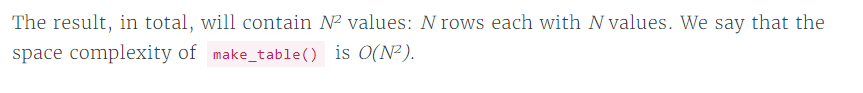

**Task**

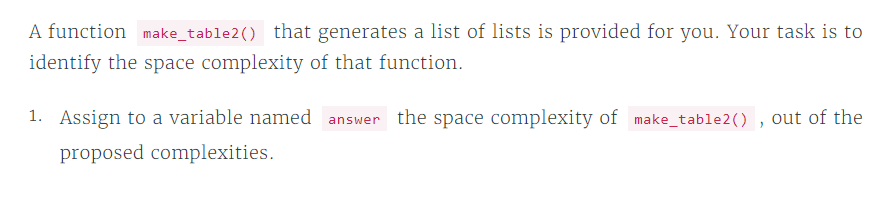

**Answer**

In [3]:
def make_table2(N):
    table = []
    for _ in range(N):
        row = []
        for _ in range(N):
            row.append([1 for _ in range(N)])
        table.append(row)
    return table

# Proposed complexities
space_complexity1 = "O(N)"
space_complexity2 = "O(N^2)"
space_complexity3 = "O(N^3)"

# Assign the space complexity of make_table2() to answer
answer = space_complexity3

A computer has two memory systems. The **primary memory**, also known as `RAM` (random access memory), is a very fast memory used to store temporary values. This memory is not persistent, meaning that if the computer is turned off or crashes, everything stored in it will be lost. This is where variables are stored when a program is executed.

The **secondary memory** is the `hard drive`. This memory is much slower than the RAM but has a lot more capacity. The secondary memory is persistent, so once something is stored, it will remain there unless it is explicitly deleted.

When we talk about the memory consumption of an algorithm, we refer to the amount of primary memory that is allocated by the algorithm. Even if an algorithm processes a 1 TB file from disk, if it does it in chunks and allocates, at most, 1 GB of memory at any given time, then its memory consumption will be 1 GB, not 1 TB. What matters is the maximum RAM that is required to execute the algorithm, not the amount of data it processes in total.

*Numeric values*, *characters*, and *references to variables* are the three basic types of data that we store in a Python program. All of these have space complexity O(1). Modeling the space complexity of an algorithm consists of estimating how many of those basic types we allocate in memory, as a function of the size of the input.

When analyzing an algorithm, we do not include the space complexity of the input (arguments) in our model. We only account for the memory allocated by the algorithm itself. For example, consider the `add_values()` function that adds together all values in a given list:

In [4]:
def add_values(values):
    total = 0
    for value in values:
        total += value
    return total

There are only two variables declared by this function: `total` and the `for` variable, `value`. These are both numeric values, so their space complexity is *O(1)*. Therefore, the total space complexity of `add_values()` is *O(1)*. We do not take space occupied by the input, `values`.

More complex data types are analyzed based on the amount of the basic types of data they store. For instance, consider the following `Coordiante3D` class representing 3D coordinates:

In [5]:
class Coordinate3D():
    def __init__(self, x, y, z):
        self.x = x          # 1
        self.y = y          # 1
        self.z = z          # 1


Assuming that `x`, `y`, and `z` are all (reasonably sized) numeric values, each of them will use *O(1)* memory. The total space complexity of a `Coordinate3D` instance is *O(3) = O(1)*. The simplification steps used for space complexity are the same that we used for time complexity:

1. Replace constants by 1
2. Remove slower-growing terms

Let's see another example. Consider the following `Person` class:

In [7]:
class Person():
    def __init__(self, name, age):
        self.name = name     # len(name)
        self.age = age       # 1


Assuming that `name` is a string and `age` is a number, the space complexity of an instance of `Person` will be

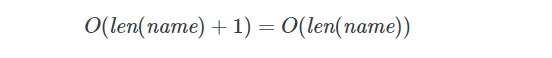

**Task**

A function `read_persons()` that reads a CSV file and creates one `Person` instance per row is provided. Our task is to identify its space complexity as a function of the number of persons in the CSV file.

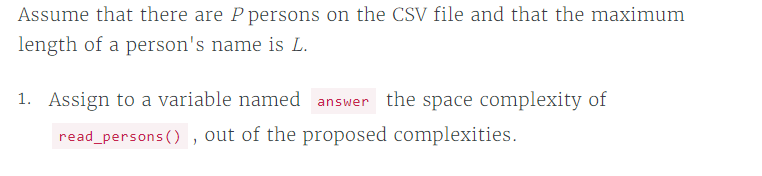

**Answer**

In [9]:
class Person():
    
    def __init__(self, name, age):
        self.name = name     
        self.age = age      

import csv
def read_persons():
    persons = []
    with open('persons.csv') as f:
        next(f)
        rows = list(csv.reader(f))
        for row in rows:
            person = Person(row[0], int(row[1]))
            persons.append(person)
    return persons

# proposed complexities
space_complexity1 = "O(P)"
space_complexity2 = "O(P + L)"
space_complexity3 = "O(P * L)"
space_complexity4 = "O(L)"

# Assign the space complexity of read_persons() to answer
answer = space_complexity3

When designing algorithms, we can often trade off memory for speed. We will see an example where we can significantly reduce the time complexity of an algorithm by increasing its space complexity.

Consider the following problem.

Given a list of distinct values and a list of distinct target values, we want to build a dictionary indexed on those target values that says whether each of those belongs or not to the given value list.

For example, if we did it by hand, we would have:

In [10]:
values = [4, 6, 3, 9, 1]
targets = [9, 0, 3]

found = {}
found[9] = True  # because 9 is in values
found[0] = False # because 0 is not in values
found[3] = True  # because 3 is in values

The most direct way of implementing an algorithm for the above problem is to iterate over all targets and, for each target value, check whether it is in the list of values.

In [12]:
def find_targets(values, targets):
    found = {}                     
    for target in targets:           
        found[target] = target in values
    return found

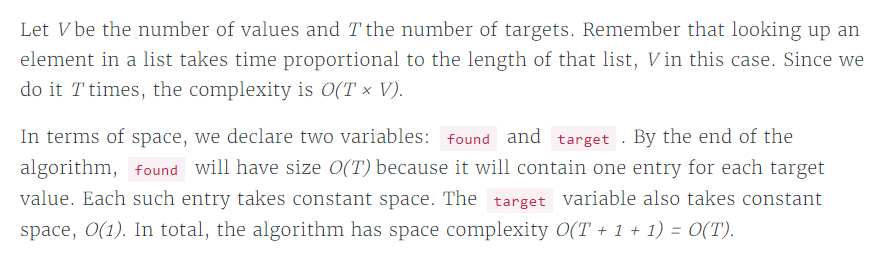

**Task**

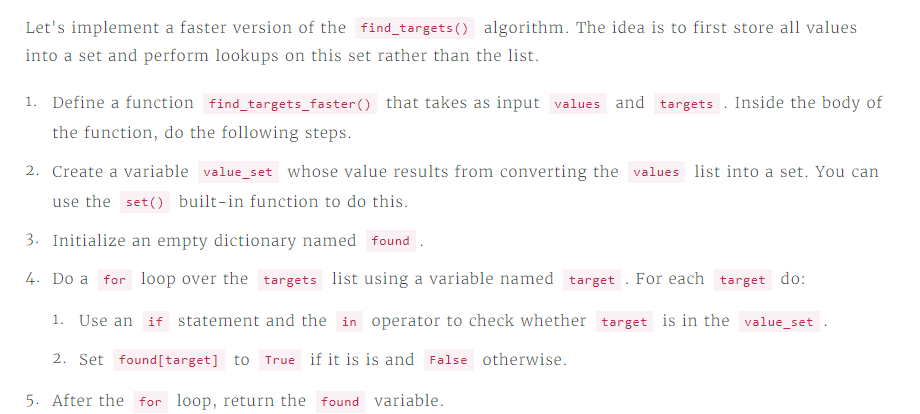

**Answer**

In [14]:
# Provided input
test_values = [4, 6, 3, 9, 1]
test_targets = [9, 0, 3]      
# Expected output: {9: True, 0: False, 3: True}

def find_targets_faster(values, targets):
    value_set = set(values)
    found = {}
    for target in targets:
        found[target] = target in value_set
    return found

print(find_targets_faster(test_values, test_targets))

{9: True, 0: False, 3: True}


Next, we show a possible implementation together with a time complexity analysis:

In [15]:
def find_targets_faster(values, targets):
    value_set = set(values)                 # V
    found = {}                              # 1
    for target in targets:                  # T
        found[target] = target in value_set # 1
    return found                            # 1

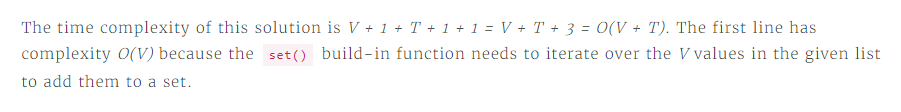

The line in the `for` loop body takes constant time to be executed because the `in` lookup is now made over a set rather than a list. We will learn later how dictionaries and sets work internally and confirm that, checking whether an element belongs to a set can be done in constant time.

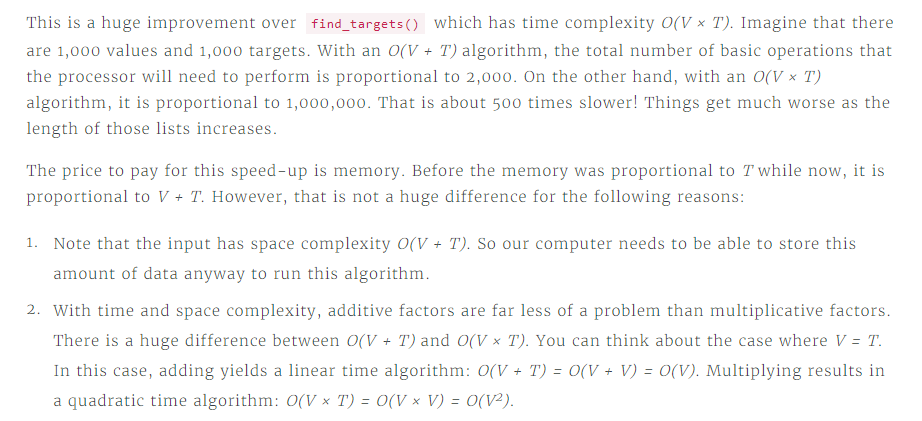

This example illustrates a common technique that can often be used to accelerate an algorithm. Preprocessing some of the input of an algorithm into a more suitable data structure is often a solution to improve the time complexity of an algorithm.

In this case, we preprocess the list and transform it into a set. The reason for choosing a set is that it supports constant-time lookups. This is a considerable speed-up to the linear time lookups like a list.

Throughout the remainder of this file, we will work on a similar problem and develop three different algorithms for it. The problem is the following:

    * Given a list of values and a list of target sums, find out which target sums can be obtained by adding two values. These values do not need to be distinct; we can use the same element twice. For example, if we were to do it by hand, we would have:

In [16]:
values = [1, 2, 5]
targets_sums = [2, 3, 7, 8]

sums = {}
sums[2] = True  # 2 = 1 + 1
sums[3] = True  # 3 = 1 + 2
sums[7] = True  # 7 = 2 + 5
sums[8] = False # No two elements of values add up to 8

Note that, as in the previous example, the result is a dictionary indexed on the target sums with a boolean value depending on whether or not the target can be obtained as a sum of two values in the given list. Also, note we are allowed to use the same value twice.

Let's start by implementing a first solution to this problem.

**Task**

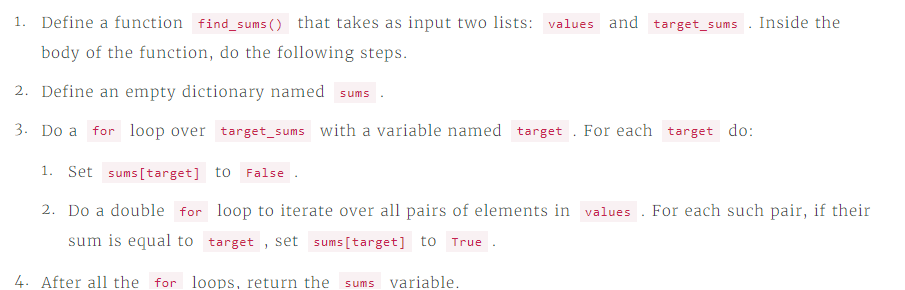

**Answer**

In [17]:
# Provided input
test_values = [1, 2, 5]
test_targets = [2, 3, 7, 8]      
# Expected output:
# {2: True, 3: True, 7: True, 8: False}

def find_sums(values, target_sums):
    sums = {}
    for target in target_sums:
        sums[target] = False
        for i in range(len(values)):
            for j in range(i, len(values)):
                if values[i] + values[j] == target:
                    sums[target] = True
    return sums

print(find_sums(test_values, test_targets))

{2: True, 3: True, 7: True, 8: False}


Above we've implemented a first algorithm for solving the sums of pairs problem:

Let V be the length of `values` and T the length of `target_sums`. What are the time and space complexities of this algorithm?

Let's analyze the time complexity of this algorithm. Let's first focus on the two innermost `for` loops:

`for i in range(len(values)):                # V
    for j in range(i, len(values)):         # V, V-1, V-2, ..., 1
        if values[i] + values[j] == target:
            sums[target] = True`

The second line is executed V times when i = 0, V - 1 times when i = 1 and so on. In total, as we've learned in the previous file, this adds up to:

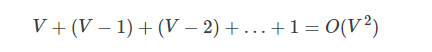

We can now do a time complexity analysis of the algorithm:

In [19]:
def find_sums(values, target_sums):
    sums = {}                                       # 1
    for target in target_sums:                      # T
        sums[target] = False                        # T
        for i in range(len(values)):                # T * V               
            for j in range(i, len(values)):         # T * V^2 <- The V^2 comes 
                if values[i] + values[j] == target: # T * V^2    from our previous 
                    sums[target] = True             # T * V^2    analysis
    return sums                                     # 1

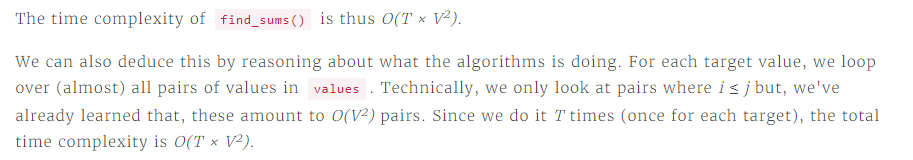

We recommend to try to get used to this second type of analysis, where we reason about what the algorithm is doing as a whole instead of reasoning line by line. As algorithms get more complex, it can be difficult to find line by line expressions.

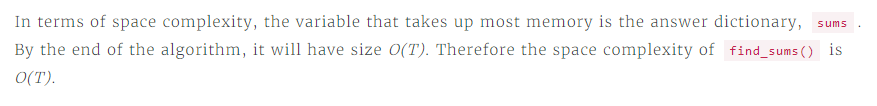

When we see a O(T × V2) time complexity, there should be an alarm ringing in your head screaming for slow performance. To see this, imagine that V = T = 10000. Then, the number of basic instructions executed by the algorithm is roughly:

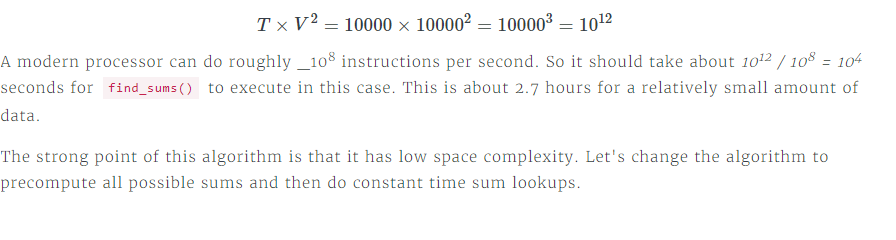

**Task**

Let's implement another solution that first precomputes all possible sums that can be made with two values, from the given value list. Then we will use those precomputed sums to perform constant-time lookups to identify which target sums can be made.

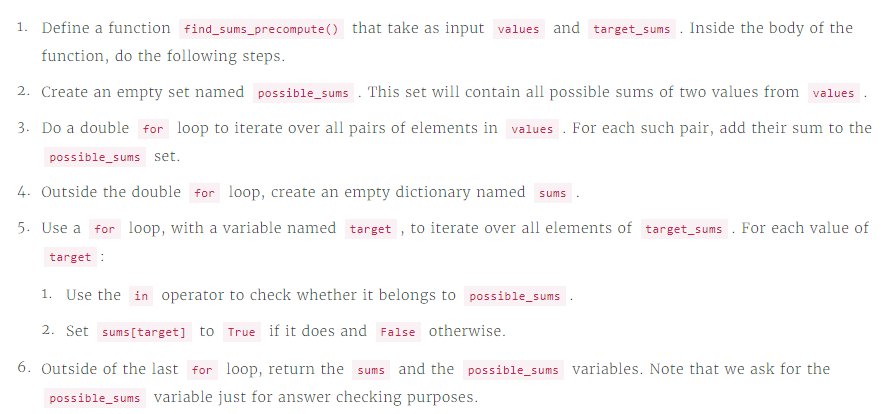

**Answer**

In [20]:
# Provided input
test_values = [1, 2, 5]
test_targets = [2, 3, 7, 8]      
# Expected output: 
# ({2: True, 3: True, 7: True, 8: False}, {2, 3, 4, 6, 7, 10})

def find_sums_precompute(values, target_sums):
    possible_sums = set()
    for i in range(len(values)):
        for j in range(i, len(values)):
            possible_sums.add(values[i] + values[j])
    sums = {}
    for target in target_sums:
        sums[target] = target in possible_sums
    return sums, possible_sums

print(find_sums_precompute(test_values, test_targets))

({2: True, 3: True, 7: True, 8: False}, {2, 3, 4, 6, 7, 10})


Above, we implemented a second algorithm for solving the sums of pairs problem:

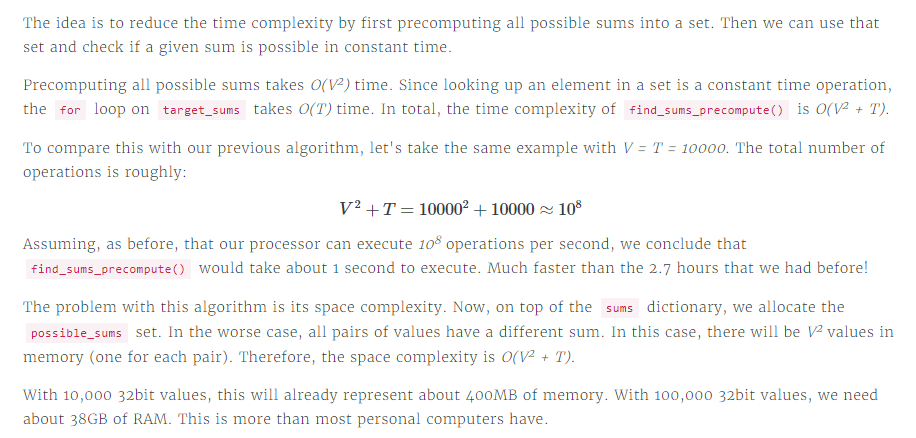

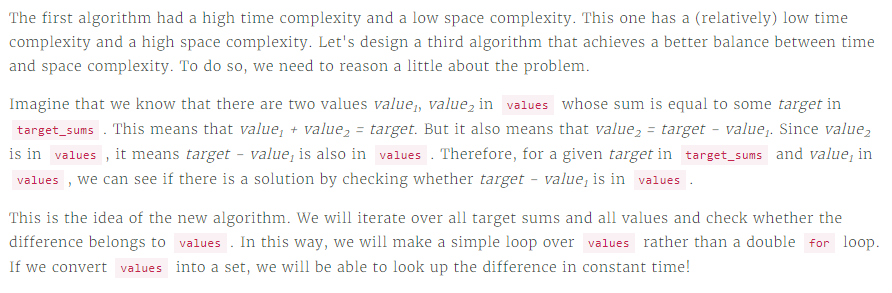

**Task**

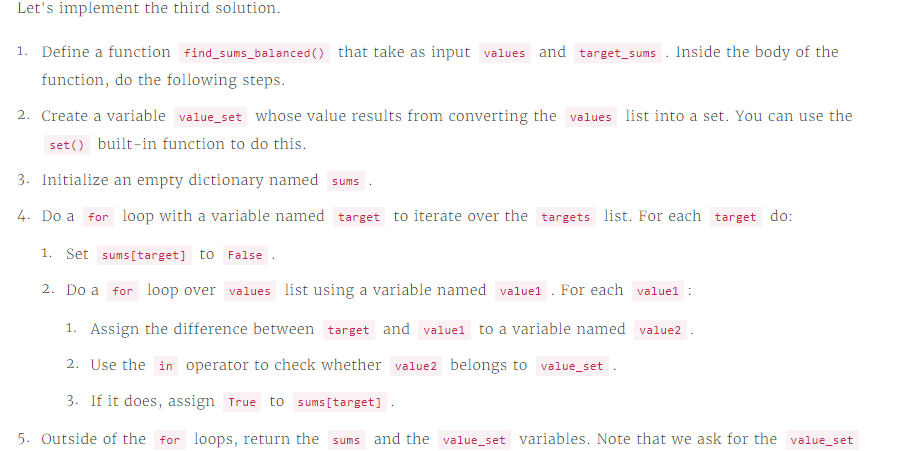

**Answer**

In [21]:
# Provided input
test_values = [1, 2, 5]
test_targets = [2, 3, 7, 8]      
# Expected output: 
# ({2: True, 3: True, 7: True, 8: False}, {1, 2, 5})

def find_sums_balanced(values, target_sums):
    value_set = set(values)
    sums = {}
    for target in target_sums:
        sums[target] = False
        for value1 in values:
            value2 = target - value1
            if value2 in value_set:
                sums[target] = True
    return sums, value_set

print(find_sums_balanced(test_values, test_targets))

({2: True, 3: True, 7: True, 8: False}, {1, 2, 5})


Above we implemented the third version of the algorithm.

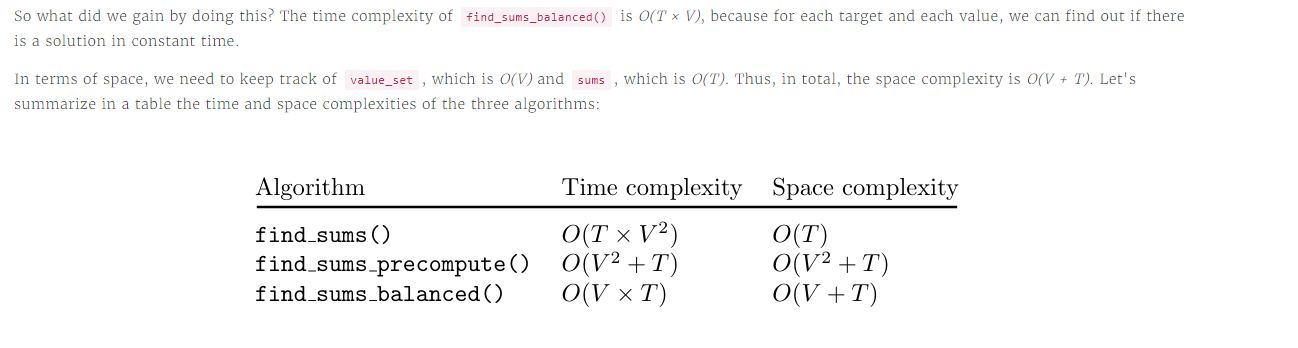

As we can see, the different algorithms offer different speed and memory trade-offs. None of the algorithms are universally better than the others. It all depends on the situations where they are executed. However, it is hard to imagine a situation where we would use `find_sums()` over `find_sums_balanced()`, because the memory requirements are almost the same — and in terms of speed, `find_sums_balanced()` is V times faster.

In data science, we often have data that we collected and want to query for insights. In this context, our values can be seen as the collected data and the target values as queries. In this situation, it is likely that the total number of queries that we will make over the data, T, is very large. Then, it is probably a good idea to use an algorithm like `find_sums_precompute()` which takes some time to preprocess the data and makes answering each query very efficient.

The important takeaway is that there are multiple ways of writing an algorithm for the same problem. Each solution will have a different time and space complexity trade-off. Which algorithm is better often depends on the exact setting over which it will be used. When designing algorithms, it is important to have the usage scenario in mind to make the best choices.

Now, we modify the `find_sums_balanced()` algorithm so that it only considers pairs of distinct values as a solution.

In our previous example:

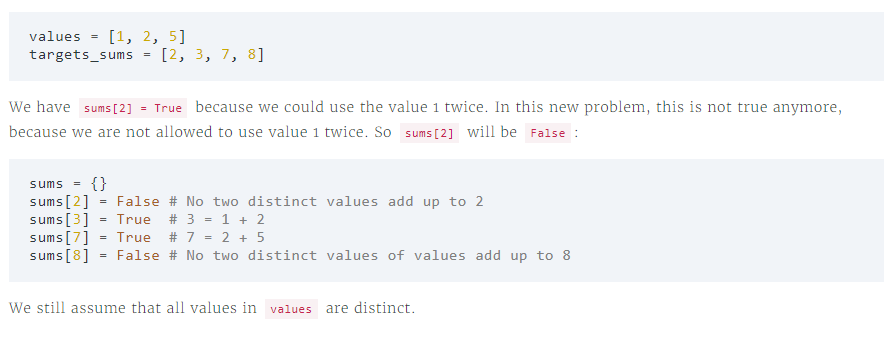

**Task**

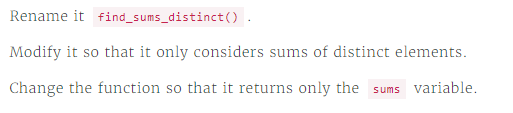

**Answer**

In [23]:
"""
def find_sums_balanced(values, target_sums):
    # Convert the value into a set
    value_set = set(values)
    sums = {}
    # Lookup the value
    for target in target_sums:
        sums[target] = False
        for value1 in values:
            value2 = target - value1
            if value2 in value_set:
                sums[target] = True
    return sums, value_set
"""

# Provided input
values = [1, 2, 5]
targets = [2, 3, 7, 8]      
# Expected output: 
# {2: False, 3: True, 7: True, 8: False}

def find_sums_distinct(values, target_sums):
    value_set = set(values)
    sums = {}
    for target in target_sums:
        sums[target] = False
        for value1 in values:
            value2 = target - value1
            if value1 != value2 and value2 in value_set:
                sums[target] = True
    return sums

print(find_sums_distinct(values, targets))

{2: False, 3: True, 7: True, 8: False}


In this file, we learned how to model the memory consumption of an algorithm. Making a space complexity analysis uses the same principles as doing a time complexity analysis. We focus on the rate at which the memory consumption changes as a function of the input rather than modeling the exact amount of memory that is used of a specific input.

We've also learned that in general, we can trade speed for memory and vice-versa. Designing a good algorithm depends on the context over which it will be used. Sometimes, memory is a high constraint and we have to sacrifice speed in order to be able to execute the algorithm. Other times, memory is not an issue and by preprocessing the data into an appropriate data structure, we can usually significantly increase the time complexity of an algorithm.